# Знакомство с `torch.Tensor`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/torch.html


## Задачи для совместного разбора

In [ ]:
import torch
import numpy as np

1\. Создайте тензор и исследуйте его основные характеристики

In [ ]:
x = torch.tensor([[1.0, 2.0, 3.0],
                  [5.0, 6.0, 7.0]])
print(f"Торч: {x}")
print(f"Тип данных торча: {x.dtype}")
print(f"Тип устройства: {x.device}")
print(f"Размерность: {x.ndim}")
print(f"Количество элементов торча: {x.numel()}")
print(f"Размер: {x.shape}")
print(f"Тип торча: {type(x)}")


Торч: tensor([[1., 2., 3.],
        [5., 6., 7.]])
Тип данных торча: torch.float32
Тип устройства: cpu
Размерность: 2
Количество элементов торча: 6
Размер: torch.Size([2, 3])
Тип торча: <class 'torch.Tensor'>


2\. Создайте трехмерный тензор и рассмотрите основные способы индексирования по нему

In [ ]:
x = torch.tensor([[[1.0, 2.0, 3.0],
                   [3.0, 4.0, 5.0]],
                  [[6.0, 7.0, 8.0],
                   [9.0, 10.0, 11.0]]])
print(x[0])
print("-----")
print(x[0, 1])
print("-----")
print(x[0, 0, 1])
print("-----")
print(x[:, 0, :])
print("-----")
print(x[0, :, 0])

tensor([[1., 2., 3.],
        [3., 4., 5.]])
-----
tensor([3., 4., 5.])
-----
tensor(2.)
-----
tensor([[1., 2., 3.],
        [6., 7., 8.]])
-----
tensor([1., 3.])


3\. Создайте тензор (4х4) и модифицируйте следующим образом: ко всем четным столбцам прибавьте 1, из нечетных вычтите 1.

In [ ]:
x = torch.tensor([[1.0, 2.0, 3.0, 4.0],
                  [5.0, 6.0, 7.0, 8.0],
                  [9.0, 10.0, 11.0, 12.0],
                  [13.0, 14.0, 15.0, 16.0]])
x[:, ::2] += 1
x[:, 1::2] -=1
print(x)

tensor([[ 2.,  1.,  4.,  3.],
        [ 6.,  5.,  8.,  7.],
        [10.,  9., 12., 11.],
        [14., 13., 16., 15.]])


In [ ]:
x = torch.tensor([[1.0, 2.0, 3.0, 4.0],
                  [5.0, 6.0, 7.0, 8.0],
                  [9.0, 10.0, 11.0, 12.0],
                  [13.0, 14.0, 15.0, 16.0]])
x[:, ::2] -= 1
x[:, 1::2] +=1
print(x)

tensor([[ 0.,  3.,  2.,  5.],
        [ 4.,  7.,  6.,  9.],
        [ 8., 11., 10., 13.],
        [12., 15., 14., 17.]])


4\. Исследуйте совместимость `torch` с `numpy` и `sklearn`

In [ ]:
a = np.array([1, 2, 3])
x = torch.from_numpy(a)
b = x.numpy()
print(x, b)

tensor([1, 2, 3]) [1 2 3]


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
tns = torch.tensor([[1.0, 2.0, 3.0],
                    [4.0, 5.0, 6.0]])
arr = tns.numpy()
scale_np = ss.fit_transform(arr)

tns1 = torch.from_numpy(scale_np)
tns1



tensor([[-1., -1., -1.],
        [ 1.,  1.,  1.]])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте двумерный тензор размера (100000, 10), заполненный нулями. Используя прихотливое индексирование, поставьте в каждой строке тензора ровно одну единицу в случайно выбранном столбце. Рассчитайте и выведите на экран вероятности $p_i$ того, что для случайно выбранной строки в столбце $i$ будет стоять единица.

In [ ]:
x = torch.zeros(100000, 10)
indicies = torch.randint(0, 10, (100000,))
x[torch.arange(100000), indicies] = 1
column_sums = x.sum(dim=0)
prob = column_sums / 100000
prob

tensor([0.0983, 0.0999, 0.1012, 0.1011, 0.0998, 0.1014, 0.0970, 0.0999, 0.1007,
        0.1007])

<p class="task" id="2"></p>

2\. При помощи прихотливого индексирования для двумерного тензора размерности (10, 10), состоящего из случайных целых чисел в пределах от 0 до 10, получите тензор элементов, находящихся сразу над побочной диагональю.

In [ ]:
x2 = torch.randint(0, 11, (10, 10))
n = 10
rows = torch.arange(0, n-1)
cols = 8 - rows
sum_above_antidig = x2[rows, cols]
sum_above_antidig

tensor([ 7, 10,  7,  4,  8,  6,  5, 10,  5])

<p class="task" id="3"></p>

3\. Создайте двумерный тензор $t$ размерности (5, 5), состоящий из случайных чисел в пределах от 0 до 100. Обнулить все значения в массиве, расположенные вне квадрата размера 3х3 вокруг максимального элемента. Если максимумов несколько, обнулите элементы около любого из них.

In [ ]:
x3 = torch.randint(0, 101, (5, 5))
x3
rand
randn

tensor([[23, 82,  0, 86, 78],
        [99, 63,  6, 57, 30],
        [29, 51, 49, 25, 36],
        [39, 94, 67, 55, 30],
        [52, 21,  4, 18, 78]])

In [ ]:
max_val = x3.max()
max_index = (x3==max_val).nonzero()[0]
i, j = max_index.tolist()

row_start = max(i-1, 0)
row_end = min(i+2, 5)
col_start = max(j-1, 0)
col_end = min(j+2, 5)

mask = torch.zeros_like(x3, dtype=torch.bool)
mask[row_start:row_end, col_start:col_end] = True
x3_zero = x3 * mask
x3_zero

tensor([[23, 82,  0,  0,  0],
        [99, 63,  0,  0,  0],
        [29, 51,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]])

<p class="task" id="4"></p>

4\. Создайте трехмерный массив размерности (2, 5, 5) на основе решения задачи 3 (объедините исходный и результирущий тензор вдоль нулевой оси). Сохраните полученный трехмерный тензор в файл `tensor.pt`. Загрузите полученный тензор и покажите, что все элементы двух тензоров совпадают.

In [ ]:
x3_stack = torch.stack([x3, x3_zero], dim=0)
torch.save(x3_stack, "tensor.pt")
load_x3 = torch.load("tensor.pt")
print(load_x3)
#load_x3 == x3_stack


tensor([[[23, 82,  0, 86, 78],
         [99, 63,  6, 57, 30],
         [29, 51, 49, 25, 36],
         [39, 94, 67, 55, 30],
         [52, 21,  4, 18, 78]],

        [[23, 82,  0,  0,  0],
         [99, 63,  0,  0,  0],
         [29, 51,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0]]])


<p class="task" id="5"></p>

5\. Создайте четырехмерный массив `t` размерности (2, 3, 5, 5), заполненный случайными целыми числами от 1 до 10 (сами значения должны быть представлены типом float32). Рассчитайте среднее значение для каждого двумерного тензора `t[i, j, :, :]`. Представьте результат в виде трехмерного тензора размера (2, 3, 1).

In [ ]:
x5 = torch.randint(1, 11, (2, 3, 5, 5), dtype=torch.float32)


# arr = np.array([])
# for i in range(2):
#   for j in range(3):
#     item = x5[i, j, :, :].sum() / x5[i, j, :, :].numel()
#     arr = np.append(arr, item)

# result = torch.tensor(arr).reshape(2, 3, 1)
means = x5.mean(dim=(2,3), keepdim=True)
result = means.squeeze(-1)
result


tensor([[[5.5600],
         [5.7200],
         [5.1600]],

        [[5.1200],
         [6.0800],
         [5.5600]]])

<p class="task" id="6"></p>

6\. Создайте одномерный тензор размера `N=100_000_000`, заполненный числами из экспоненциального распредления с параметром $\lambda=5$. Рассчитайте значения для построения гистограммы при помощи пакета `torch`. Визуализируйте гистограмму. Проверьте возможность использования GPU. При наличии GPU перенесите созданный тензор в память GPU, повторите вычисления. Сравните время расчетом с и без использования GPU.

In [ ]:
import time
import matplotlib.pyplot as plt

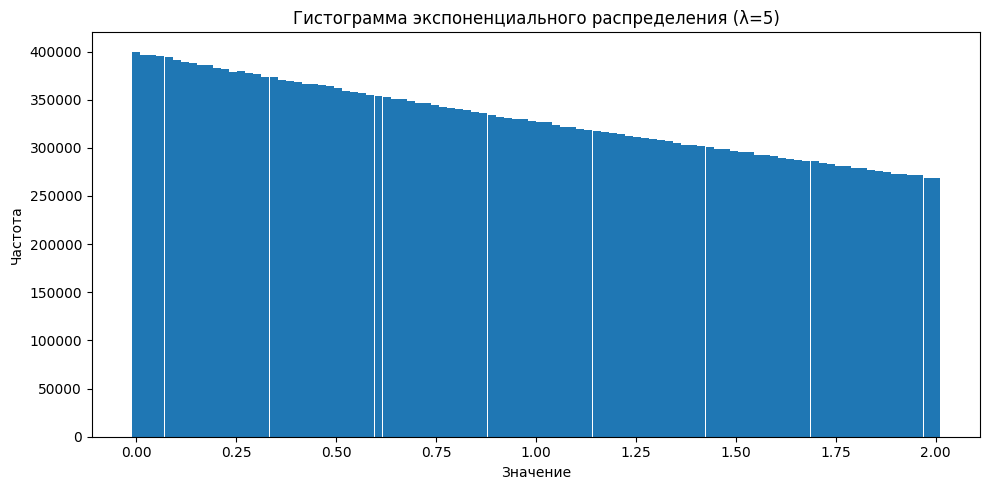

3.01865553855896 2.580533027648926


In [ ]:
devicr_cpu = torch.device("cpu")
device_gpu = torch.device("cuda")

N = 100_000_000
lambda_val = 5.0
rate = 1 / lambda_val

start_cpu = time.time()
x6_cpu = torch.distributions.Exponential(rate).sample((N,))
hist_cpu = torch.histc(x6_cpu, bins=100, min=0.0, max=2.0)
end_cpu = time.time()
cpu_time = end_cpu - start_cpu

start_gpu = time.time()
x6_gpu = torch.distributions.Exponential(rate).sample((N,))
hist_gpu = torch.histc(x6_gpu, bins=100, min=0.0, max=2.0)
hist_gpu = hist_gpu.to("cpu")
end_gpu = time.time()
gpu_time = end_gpu - start_gpu

plt.figure(figsize=(10, 5))
plt.bar(torch.linspace(0.0, 2.0, 100).numpy(), hist_cpu.numpy(), width=0.02)
plt.title("Гистограмма экспоненциального распределения (λ=5)")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.tight_layout()

plt.show()

print(cpu_time, gpu_time)

<p class="task" id="7"></p>

7\. Создайте четырехмерный тензор размера (10, 6, 6, 3), заполненный случайными целыми числами от 0 до 255. Считая, что данный тензор представляет собой батч из 10 картинок размера 6х6 в формате RGB, измените тензор следующим образом. Для оттенков красного обнулите все столбцы, кроме первых двух; для оттенков зеленого обнулите столбцы со второго по четвертый; для оттенков синего обнулите пятый и шестой столбцы. Для выполнения задания используйте механизм распространения.

In [ ]:
x7 = torch.randint(0, 256, (10, 6, 6, 3))
mask_r = torch.tensor([1, 1, 0, 0, 0, 0])
mask_g = torch.tensor([1, 0, 0, 0, 0, 1])
mask_b = torch.tensor([1, 1, 1, 1, 0, 0])
mask = torch.stack([mask_r, mask_g, mask_b], dim=-1).unsqueeze(0).unsqueeze(0)

modi = x7 * mask
# print(mask, mask.shape)
modi

tensor([[[[ 10,  17, 227],
          [ 99,   0,  38],
          [  0,   0, 242],
          [  0,   0, 214],
          [  0,   0,   0],
          [  0, 134,   0]],

         [[211, 249,  89],
          [145,   0,  84],
          [  0,   0, 158],
          [  0,   0,  28],
          [  0,   0,   0],
          [  0, 212,   0]],

         [[ 38,  70,  12],
          [ 93,   0, 153],
          [  0,   0,  21],
          [  0,   0, 105],
          [  0,   0,   0],
          [  0, 255,   0]],

         [[124, 121, 179],
          [ 45,   0,  63],
          [  0,   0, 239],
          [  0,   0, 143],
          [  0,   0,   0],
          [  0, 208,   0]],

         [[197,  33, 168],
          [135,   0, 208],
          [  0,   0, 170],
          [  0,   0, 240],
          [  0,   0,   0],
          [  0, 164,   0]],

         [[175, 153,  40],
          [113,   0, 131],
          [  0,   0, 129],
          [  0,   0,  27],
          [  0,   0,   0],
          [  0, 157,   0]]],


        [[[222

## Обратная связь
- [ ] Хочу получить обратную связь по решению